# CNN

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [17]:
Data_path="C:\\Users\\SREEHARI\\Desktop\\internship\\my training\\Chapter11_CNN\\Datasets\\"

## Reshape images in ANN

In [5]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)

x_train = X_train.reshape(60000, 784)
x_test = X_test.reshape(10000, 784)

print("X_train new shape", x_train.shape)
print("X_test new shape", x_test.shape)

X_train shape (60000, 28, 28)
X_test shape (10000, 28, 28)
X_train new shape (60000, 784)
X_test new shape (10000, 784)


In [6]:
num_classes=10
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(Y_train, num_classes)
y_test = keras.utils.to_categorical(Y_test, num_classes)

model = keras.Sequential()
model.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
model.add(layers.Dense(20, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train,epochs=2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                15700     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1875/1875 [==============================] - 23s 8ms/step - loss: 1.0173 - accuracy: 0.7520
Epoch 2/2
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3586 - accuracy: 0.9019


## Convolution Layer

In [7]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)

X_train shape (60000, 28, 28)
X_test shape (10000, 28, 28)


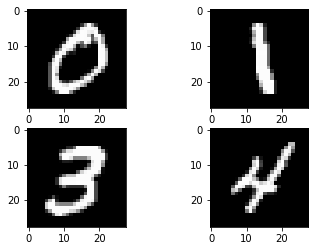

In [8]:
# Plot 4 images as gray scale

%matplotlib inline
import matplotlib.pyplot as plt
plt.subplot(221)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[6], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[7], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[9], cmap=plt.get_cmap('gray'))

# show the plot
plt.show()

## Random kernel_initializer

Actual Image


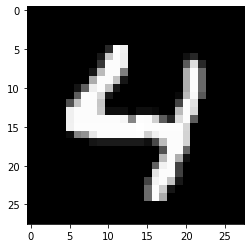

Random Weights Kennel


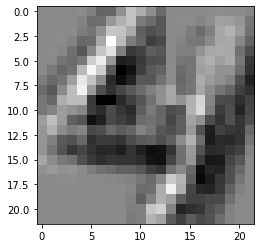

In [9]:
#i=int(np.random.rand(1,1)*60000)
#634 #924 #952 #3611  #4458
import numpy as np
x=X_train[3611]


print("Actual Image")
plt.imshow(x, cmap=plt.get_cmap('gray'))
plt.show()


print("Random Weights Kennel")
from tensorflow.keras.layers import Conv2D
model=Sequential()
model.add(Conv2D(filters=1,
                 kernel_size=7,
                 input_shape=(28,28,1),
                 kernel_initializer='random_uniform'))

img_reshape=np.expand_dims(x, axis=0)
img_reshape=np.expand_dims(img_reshape, axis=3)
img_reshape=model.predict(img_reshape)
pixels = np.matrix(img_reshape[:][:][:][0])
plt.imshow(pixels,cmap=plt.get_cmap('gray'))
plt.show()

### Constant kernel_initializer

In [10]:
import numpy as np
filter1=np.array([[1,1,1,1,1,1,1],
           [1,1,1,1,1,1,1],
           [100,100,100,100,100,100,100],
           [100,100,100,100,100,100,100],
           [100,100,100,100,100,100,100],
           [1,1,1,1,1,1,1],
           [1,1,1,1,1,1,1]])
print("filter1 \n", filter1)

filter2=np.transpose(filter1)
print("filter2 \n",filter2)

filter1 
 [[  1   1   1   1   1   1   1]
 [  1   1   1   1   1   1   1]
 [100 100 100 100 100 100 100]
 [100 100 100 100 100 100 100]
 [100 100 100 100 100 100 100]
 [  1   1   1   1   1   1   1]
 [  1   1   1   1   1   1   1]]
filter2 
 [[  1   1 100 100 100   1   1]
 [  1   1 100 100 100   1   1]
 [  1   1 100 100 100   1   1]
 [  1   1 100 100 100   1   1]
 [  1   1 100 100 100   1   1]
 [  1   1 100 100 100   1   1]
 [  1   1 100 100 100   1   1]]


Actual Image


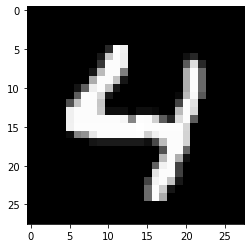

Horizontal Line


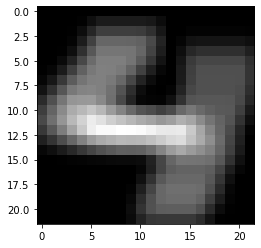

Vertical Line


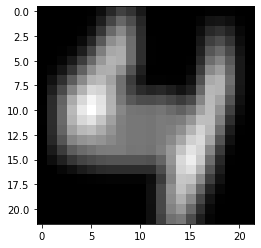

In [11]:
#Try #634 #924 #952 #3611  #4458
x=X_train[3611]

print("Actual Image")
plt.imshow(x, cmap=plt.get_cmap('gray'))
plt.show()

print("Horizontal Line")

model=Sequential()
model.add(Conv2D(1,
                 kernel_size=7,
                 input_shape=(28,28,1),
                 kernel_initializer=keras.initializers.Constant(filter1)))

img_reshape=np.expand_dims(x, axis=0)
img_reshape=np.expand_dims(img_reshape, axis=3)
img_reshape=model.predict(img_reshape)
pixels = np.matrix(img_reshape[:][:][:][0])
plt.imshow(pixels,cmap=plt.get_cmap('gray'))
plt.show()

print("Vertical Line")
model=Sequential()
model.add(Conv2D(1,
                 kernel_size=7,
                 input_shape=(28,28,1),
                 kernel_initializer=keras.initializers.Constant(filter2)))

img_reshape=np.expand_dims(x, axis=0)
img_reshape=np.expand_dims(img_reshape, axis=3)
img_reshape=model.predict(img_reshape)
pixels = np.matrix(img_reshape[:][:][:][0])
plt.imshow(pixels,cmap=plt.get_cmap('gray'))
plt.show()

### Filters for Colour Images

12505
imp_path C:\Users\SREEHARI\Desktop\internship\my training\Chapter11_CNN\Datasets\43534.png
(32, 32, 3)
[[[12.156863  10.666667   8.235294 ]
  [12.941177   9.176471   7.6862745]
  [13.490196   8.862745   8.       ]
  [11.372549   7.372549   6.27451  ]
  [11.607843   7.6862745  6.666667 ]]

 [[11.843138  10.745098   8.078431 ]
  [13.960785  10.82353    8.941176 ]
  [14.901961   9.960784   9.019608 ]
  [13.411765   8.941176   7.921569 ]
  [10.901961   6.666667   5.7254906]]

 [[11.6862755 10.745098   8.       ]
  [13.803922  11.058825   9.09804  ]
  [14.745098   9.725491   9.09804  ]
  [15.686275  11.215687  10.82353  ]
  [11.294118   7.0588236  6.745098 ]]

 [[11.294118  10.509805   7.764706 ]
  [12.235294  10.3529415  8.156863 ]
  [13.254902   9.725491   8.784314 ]
  [17.960785  15.215687  14.901961 ]
  [15.764706  13.09804   12.862745 ]]

 [[11.294118  10.666667   7.8431373]
  [12.078432  11.058825   8.470589 ]
  [14.039216  12.313726  10.509805 ]
  [18.117647  16.62745   15.9215

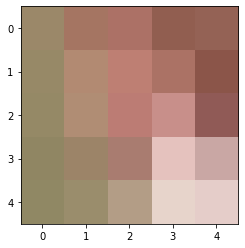

In [18]:
i=int(np.random.rand(1,1)*60000)
print(i)

imp_path=Data_path+"43534.png"
print("imp_path",imp_path)

%matplotlib inline
x=plt.imread(imp_path)
print(x.shape)
y=x[10:15,10:15]
print(y*20)
print(y.shape)
plt.imshow((y*255).astype(np.uint8))

## Zero Padding 

Actual Image Shape  (28, 28)


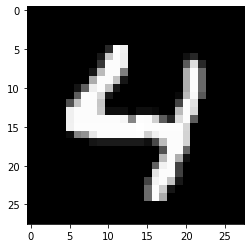

Random Weights Kennel siz3 7X7
Output Shape  (22, 22)


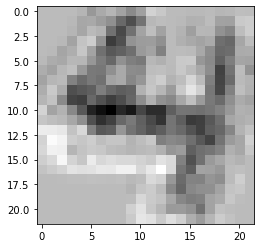

Random Weights Kennel siz3 5X5
Output Shape  (24, 24)


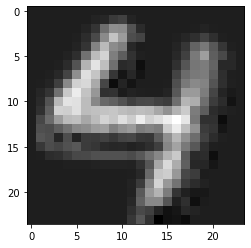

In [19]:
#i=int(np.random.rand(1,1)*60000)
#634 #924 #952 #3611  #4458
import numpy as np
x=X_train[3611]

print("Actual Image Shape " ,  x.shape)
plt.imshow(x, cmap=plt.get_cmap('gray'))
plt.show()


print("Random Weights Kennel siz3 7X7")
from tensorflow.keras.layers import Conv2D
model=Sequential()
model.add(Conv2D(filters=1,
                 kernel_size=7,
                 input_shape=(28,28,1),
                 kernel_initializer='random_uniform'))

img_reshape=np.expand_dims(x, axis=0)
img_reshape=np.expand_dims(img_reshape, axis=3)
img_reshape=model.predict(img_reshape)
pixels = np.matrix(img_reshape[:][:][:][0])
print("Output Shape " ,pixels.shape)
plt.imshow(pixels,cmap=plt.get_cmap('gray'))
plt.show()


print("Random Weights Kennel siz3 5X5")
from tensorflow.keras.layers import Conv2D
model=Sequential()
model.add(Conv2D(filters=1,
                 kernel_size=5,
                 input_shape=(28,28,1),
                 kernel_initializer='random_uniform'))

img_reshape=np.expand_dims(x, axis=0)
img_reshape=np.expand_dims(img_reshape, axis=3)
img_reshape=model.predict(img_reshape)
pixels = np.matrix(img_reshape[:][:][:][0])
print("Output Shape " ,pixels.shape)
plt.imshow(pixels,cmap=plt.get_cmap('gray'))
plt.show()

## CNN for CIFAR10

In [20]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [21]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
X_train=X_train/255
X_test=X_test/255

170500096/170498071 [==============================] - 65s 0us/step


In [22]:
print("X_train.shape", X_train.shape)
print("y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape)
print("y_test.shape", y_test.shape)

X_train.shape (50000, 32, 32, 3)
y_train.shape (50000, 1)
X_test.shape (10000, 32, 32, 3)
y_test.shape (10000, 1)


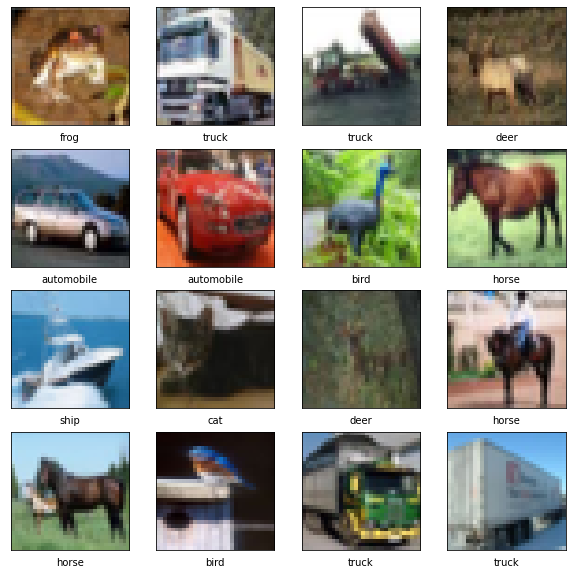

In [23]:
#Drawing Few images
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [24]:
model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)               

In [25]:
import time #To measure the execution time 
start = time.time()

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.1),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(X_train, y_train, 
          batch_size=16,
          epochs=12, 
          validation_data=(X_test, y_test))

end = time.time()
print("Execution time is", int(end - start), "seconds")

Epoch 1/12
3125/3125 [==============================] - 30s 8ms/step - loss: 1.8177 - accuracy: 0.3329 - val_loss: 1.5186 - val_accuracy: 0.4515
Epoch 2/12
3125/3125 [==============================] - 23s 7ms/step - loss: 1.4028 - accuracy: 0.4973 - val_loss: 1.3060 - val_accuracy: 0.5278
Epoch 3/12
3125/3125 [==============================] - 21s 7ms/step - loss: 1.2326 - accuracy: 0.5640 - val_loss: 1.1732 - val_accuracy: 0.5848
Epoch 4/12
3125/3125 [==============================] - 21s 7ms/step - loss: 1.1072 - accuracy: 0.6115 - val_loss: 1.0667 - val_accuracy: 0.6287
Epoch 5/12
3125/3125 [==============================] - 22s 7ms/step - loss: 1.0045 - accuracy: 0.6480 - val_loss: 1.0630 - val_accuracy: 0.6298
Epoch 6/12
3125/3125 [==============================] - 21s 7ms/step - loss: 0.9183 - accuracy: 0.6772 - val_loss: 0.9803 - val_accuracy: 0.6573
Epoch 7/12
3125/3125 [==============================] - 21s 7ms/step - loss: 0.8415 - accuracy: 0.7066 - val_loss: 0.9728 - val_ac

## Case Study- Sign Language Reading from Images 

In [26]:
#Let us keep all the libraries ready
import tensorflow.keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, AveragePooling2D,  Activation
from tensorflow.keras.layers import Reshape, Input, Lambda
from tensorflow.keras.layers import Conv2D, Convolution2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Concatenate, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras import regularizers, initializers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image
from matplotlib.pyplot import imshow, imsave
import imageio
import random

C:\Users\SREEHARI\AppData\Local\Temp\ipykernel_5736\1636337409.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img=imageio.imread(location+str(i)+"\\IMG_11"+str(img_id)+".JPG")
C:\Users\SREEHARI\AppData\Local\Temp\ipykernel_5736\1636337409.py:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img=imageio.imread(location+str(i)+"\\IMG_11"+str(img_id)+".JPG")
C:\Users\SREEHARI\AppData\Local\Temp\ipykernel_5736\1636337409.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this 

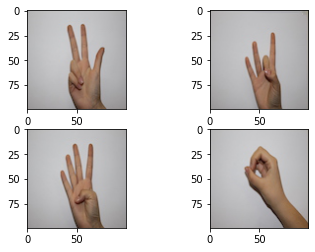

In [28]:
#Few random Images
fig, ax = plt.subplots(2,2)
location=Data_path+'Sign-Language-Digits-Dataset-master\Dataset\\'
i=random.randint(0, 9)
img_id=18+i
img=imageio.imread(location+str(i)+"\\IMG_11"+str(img_id)+".JPG")
ax[0,0].imshow(img)

i=random.randint(0, 9)
img_id=18+i
img=imageio.imread(location+str(i)+"\\IMG_11"+str(img_id)+".JPG")
ax[0,1].imshow(img)

i=random.randint(0, 9)
img_id=18+i
img=imageio.imread(location+str(i)+"\\IMG_11"+str(img_id)+".JPG")
ax[1,0].imshow(img)

i=random.randint(0, 9)
img_id=18+i
img=imageio.imread(location+str(i)+"\\IMG_11"+str(img_id)+".JPG")
ax[1,1].imshow(img)

In [29]:
########################
# Generators
########################

from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 256
target_size = (100,100)


########################
# Data Directory
########################

data_dir = location  # this is the image datasets directory
location_1=Data_path+"Sign_language_digits_dataset_64_64\\"
########################
# Data generator : Any preprocessing options/steps can be  defined here
########################
datagen = ImageDataGenerator(rescale = 1./255,  # scaling the images matrix(standard preprocessing step)
                             validation_split=0.2) # set validation split

########################
# Train generator
########################
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=target_size,   # resizing the input images to a specific size
    batch_size=batch_size,     # Batch size, iterator will generate a random batch with this size
    color_mode = 'grayscale',  # keeping the channel to grayscale for easy calculations
    class_mode='categorical',
    shuffle=True,
    subset="training") 

########################
# Validation generator
########################

validation_generator = datagen.flow_from_directory(
    data_dir, # same directory as training data
    target_size=target_size,
    batch_size=batch_size,
    color_mode = 'grayscale', 
    class_mode='categorical',
    shuffle=True,
    subset="validation") # set as validation data

Found 1653 images belonging to 10 classes.
Found 409 images belonging to 10 classes.


In [30]:
model1 = Sequential()

# Convolution layer
model1.add(Conv2D(64, (3, 3), input_shape = (100, 100, 1), activation = 'relu'))

# Pooling layer
model1.add(MaxPooling2D(pool_size = (2, 2)))

# Adding second convolutional layer
model1.add(Conv2D(64, (3, 3), activation = 'relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))

# Adding third convolutional layer
model1.add(Conv2D(64, (3, 3), activation = 'relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening
model1.add(Flatten())

# Step 4 - Fully connected dense layers
model1.add(Dense(units = 256, activation = 'relu'))
model1.add(Dense(units = 10, activation = 'softmax'))

model1.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 98, 98, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 47, 47, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 21, 21, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6400)             

In [31]:
# model1 compilation
model1.compile(optimizer =SGD(lr=0.01, momentum = 0.9), loss = 'categorical_crossentropy', metrics = ['accuracy'])

########################
# fit model and train
########################

import time
start = time.time()

model1.fit_generator(
        train_generator, 
        steps_per_epoch = len(train_generator), #total number of batches in one train epoch(train observation/batch size; also called iterations per epoch)
        epochs=20,
        validation_data = validation_generator,
        validation_steps = len(validation_generator), #total number of batches in validation(validation observation/batch size)
        verbose=1)

model1.save_weights('m1_Sign_Language_20epochs.h5')

end = time.time()
print("Execution time is", int(end - start), "seconds")

C:\Users\SREEHARI\anaconda3\envs\tfgpu\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
C:\Users\SREEHARI\anaconda3\envs\tfgpu\lib\site-packages\tensorflow\python\keras\engine\training.py:1969: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
7/7 [==============================] - 5s 567ms/step - loss: 2.3038 - accuracy: 0.0968 - val_loss: 2.3016 - val_accuracy: 0.1002
Epoch 2/20
7/7 [==============================] - 2s 236ms/step - loss: 2.3000 - accuracy: 0.1204 - val_loss: 2.2989 - val_accuracy: 0.1198
Epoch 3/20
7/7 [==============================] - 1s 179ms/step - loss: 2.2966 - accuracy: 0.1264 - val_loss: 2.2969 - val_accuracy: 0.1002
Epoch 4/20
7/7 [==============================] - 1s 206ms/step - loss: 2.2923 - accuracy: 0.1028 - val_loss: 2.2933 - val_accuracy: 0.1100
Epoch 5/20
7/7 [==============================] - 1s 199ms/step - loss: 2.2872 - accuracy: 0.2002 - val_loss: 2.2897 - val_accuracy: 0.1638
Epoch 6/20
7/7 [==============================] - 1s 216ms/step - loss: 2.2799 - accuracy: 0.2069 - val_loss: 2.2835 - val_accuracy: 0.2714
Epoch 7/20
7/7 [==============================] - 1s 204ms/step - loss: 2.2695 - accuracy: 0.3424 - val_loss: 2.2742 - val_accuracy: 0.3056
Epoch 8/20
7/7 [====

In [36]:
# model1 compilation
model1.compile(optimizer =SGD(lr=0.01, momentum = 0.9), loss = 'categorical_crossentropy', metrics = ['accuracy'])

########################
# fit model and train
########################

import time
start = time.time()

model1.fit_generator(
        train_generator, 
        steps_per_epoch = len(train_generator), #total number of batches in one train epoch(train observation/batch size; also called iterations per epoch)
        epochs=50,
        validation_data = validation_generator,
        validation_steps = len(validation_generator), #total number of batches in validation(validation observation/batch size)
        verbose=1)

model1.save_weights('m1_Sign_Language_50epochs.h5')

end = time.time()
print("Execution time is", int(end - start), "seconds")

Epoch 1/50
7/7 [==============================] - 2s 202ms/step - loss: 0.2701 - accuracy: 0.9105 - val_loss: 1.7609 - val_accuracy: 0.6112
Epoch 2/50
7/7 [==============================] - 1s 175ms/step - loss: 0.2540 - accuracy: 0.9177 - val_loss: 1.9780 - val_accuracy: 0.6161
Epoch 3/50
7/7 [==============================] - 1s 186ms/step - loss: 0.2605 - accuracy: 0.9171 - val_loss: 1.7027 - val_accuracy: 0.6112
Epoch 4/50
7/7 [==============================] - 1s 188ms/step - loss: 0.2630 - accuracy: 0.9093 - val_loss: 1.6543 - val_accuracy: 0.5990
Epoch 5/50
7/7 [==============================] - 1s 207ms/step - loss: 0.2267 - accuracy: 0.9359 - val_loss: 1.6983 - val_accuracy: 0.6161
Epoch 6/50
7/7 [==============================] - 1s 184ms/step - loss: 0.1929 - accuracy: 0.9437 - val_loss: 1.7521 - val_accuracy: 0.6186
Epoch 7/50
7/7 [==============================] - 1s 190ms/step - loss: 0.1539 - accuracy: 0.9528 - val_loss: 1.5520 - val_accuracy: 0.6430
Epoch 8/50
7/7 [====

In [37]:
model1.load_weights("C:\\Users\\SREEHARI\\Desktop\\internship\\my training\\Chapter11_CNN\\m1_Sign_Language_20epochs.h5")

model1.fit_generator(
        train_generator, 
        steps_per_epoch = len(train_generator), 
        epochs=2,
        validation_data = validation_generator,
        validation_steps = len(validation_generator), 
        verbose=1)

Epoch 1/2
7/7 [==============================] - 2s 244ms/step - loss: 0.3322 - accuracy: 0.8905 - val_loss: 1.3802 - val_accuracy: 0.6088
Epoch 2/2
7/7 [==============================] - 1s 208ms/step - loss: 0.3202 - accuracy: 0.8935 - val_loss: 1.8296 - val_accuracy: 0.5966


In [38]:
model1.load_weights("C:\\Users\\SREEHARI\\Desktop\\internship\\my training\\Chapter11_CNN\\m1_Sign_Language_50epochs.h5")

model1.fit_generator(
        train_generator, 
        steps_per_epoch = len(train_generator), 
        epochs=2,
        validation_data = validation_generator,
        validation_steps = len(validation_generator), 
        verbose=1)

Epoch 1/2
7/7 [==============================] - 2s 209ms/step - loss: 0.0275 - accuracy: 0.9903 - val_loss: 2.6372 - val_accuracy: 0.6381
Epoch 2/2
7/7 [==============================] - 1s 184ms/step - loss: 0.0712 - accuracy: 0.9794 - val_loss: 2.1125 - val_accuracy: 0.6479


# Model2 - Model with Receptive field 

Change the image shape to 64X64 

In [39]:
########################
# Generators
########################

from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 256
target_size = (64,64)


########################
# Data Directory
########################

data_dir = location  # this is the image datasets directory

########################
# Data generator : Any preprocessing options/steps can be  defined here
########################
datagen = ImageDataGenerator(rescale = 1./255,  # scaling the images matrix(standard preprocessing step)
                             validation_split=0.2) # set validation split

########################
# Train generator
########################
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=target_size,   # resizing the input images to a specific size
    batch_size=batch_size,     # Batch size, iterator will generate a random batch with this size
    color_mode = 'grayscale',  # keeping the channel to grayscale for easy calculations
    class_mode='categorical',
    shuffle=True,
    subset="training") # set as training data

########################
# Validation generator
########################

validation_generator = datagen.flow_from_directory(
    data_dir, # same directory as training data
    target_size=target_size,
    batch_size=batch_size,
    color_mode = 'grayscale', 
    class_mode='categorical',
    shuffle=True,
    subset="validation") # set as validation data

Found 1653 images belonging to 10 classes.
Found 409 images belonging to 10 classes.


In [40]:
model2 = Sequential()

# Convolution and Pooling layers
model2.add(Conv2D(16, (3, 3), input_shape = (64, 64, 1), activation = 'relu'))
model2.add(Conv2D(32, (3, 3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))


model2.add(Conv2D(64, (3, 3), activation = 'relu'))
model2.add(Conv2D(64, (3, 3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))

model2.add(Conv2D(128, (3, 3), activation = 'relu'))
model2.add(Conv2D(128, (3, 3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))


# Flattening and  Fully connected dense layers
model2.add(Flatten())
model2.add(Dense(units = 32, activation = 'relu'))
model2.add(Dense(units = 10, activation = 'softmax'))

model2.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 62, 62, 16)        160       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 60, 60, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 26, 26, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 11, 11, 128)      

In [41]:
# model compilation
model2.compile(optimizer =SGD(lr=0.01, momentum = 0.9), loss = 'categorical_crossentropy', metrics = ['accuracy'])

########################
# fit model and train
########################

import time
start = time.time()

model2.fit_generator(
        train_generator, 
        steps_per_epoch = len(train_generator), #total number of batches in one train epoch(train observation/batch size; also called iterations per epoch)
        epochs=50,
        validation_data = validation_generator,
        validation_steps = len(validation_generator), #total number of batches in validation(validation observation/batch size)
        verbose=1)

model2.save_weights('m2_Receptive_field_50epochs.h5')

end = time.time()
print("Execution time is", int(end - start), "seconds")

Epoch 1/50
7/7 [==============================] - 4s 348ms/step - loss: 2.3024 - accuracy: 0.1295 - val_loss: 2.3020 - val_accuracy: 0.1271
Epoch 2/50
7/7 [==============================] - 1s 172ms/step - loss: 2.3020 - accuracy: 0.1234 - val_loss: 2.3017 - val_accuracy: 0.1027
Epoch 3/50
7/7 [==============================] - 1s 174ms/step - loss: 2.3013 - accuracy: 0.1331 - val_loss: 2.3013 - val_accuracy: 0.1418
Epoch 4/50
7/7 [==============================] - 1s 187ms/step - loss: 2.3008 - accuracy: 0.1095 - val_loss: 2.3010 - val_accuracy: 0.1027
Epoch 5/50
7/7 [==============================] - 1s 165ms/step - loss: 2.3004 - accuracy: 0.1004 - val_loss: 2.3006 - val_accuracy: 0.1125
Epoch 6/50
7/7 [==============================] - 1s 185ms/step - loss: 2.2998 - accuracy: 0.1385 - val_loss: 2.3003 - val_accuracy: 0.1345
Epoch 7/50
7/7 [==============================] - 1s 188ms/step - loss: 2.2995 - accuracy: 0.1875 - val_loss: 2.2999 - val_accuracy: 0.1687
Epoch 8/50
7/7 [====

In [45]:
model2.load_weights("C:\\Users\\SREEHARI\\Desktop\\internship\\my training\\Chapter11_CNN\\m2_Receptive_field_50epochs.h5")

model2.fit_generator(
        train_generator, 
        steps_per_epoch = len(train_generator), #total number of batches in one train epoch(train observation/batch size; also called iterations per epoch)
        epochs=2,
        validation_data = validation_generator,
        validation_steps = len(validation_generator), #total number of batches in validation(validation observation/batch size)
        verbose=1)

Epoch 1/2
7/7 [==============================] - 2s 205ms/step - loss: 2.1702 - accuracy: 0.2559 - val_loss: 2.1176 - val_accuracy: 0.2298
Epoch 2/2
7/7 [==============================] - 1s 185ms/step - loss: 1.9981 - accuracy: 0.3249 - val_loss: 1.9387 - val_accuracy: 0.3276


## Model2 - Model with Dropout and Receptive field 

Batchsize Changed 

In [46]:
########################
# Generators
########################

from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 64
target_size = (64,64)


########################
# Data Directory
########################

data_dir = location  # this is the image datasets directory

########################
# Data generator : Any preprocessing options/steps can be  defined here
########################
datagen = ImageDataGenerator(rescale = 1./255,  # scaling the images matrix(standard preprocessing step)
                             validation_split=0.2) # set validation split

########################
# Train generator
########################
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=target_size,   # resizing the input images to a specific size
    batch_size=batch_size,     # Batch size, iterator will generate a random batch with this size
    color_mode = 'grayscale',  # keeping the channel to grayscale for easy calculations
    class_mode='categorical',
    shuffle=True,
    subset="training") # set as training data

########################
# Validation generator
########################

validation_generator = datagen.flow_from_directory(
    data_dir, # same directory as training data
    target_size=target_size,
    batch_size=batch_size,
    color_mode = 'grayscale', 
    class_mode='categorical',
    shuffle=True,
    subset="validation") # set as validation data

Found 1653 images belonging to 10 classes.
Found 409 images belonging to 10 classes.


In [47]:
model2 = Sequential()

# Convolution and Pooling layers
model2.add(Conv2D(16, (3, 3), input_shape = (64, 64, 1), activation = 'relu'))
model2.add(Conv2D(32, (3, 3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))
model2.add(Dropout(0.5))

model2.add(Conv2D(64, (3, 3), activation = 'relu'))
model2.add(Conv2D(64, (3, 3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))
model2.add(Dropout(0.5))

model2.add(Conv2D(128, (3, 3), activation = 'relu'))
model2.add(Conv2D(128, (3, 3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))
model2.add(Dropout(0.5))


# Flattening and  Fully connected dense layers
model2.add(Flatten())
model2.add(Dense(units = 32, activation = 'relu'))
model2.add(Dropout(0.5))

model2.add(Dense(units = 10, activation = 'softmax'))

model2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 62, 62, 16)        160       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 60, 60, 32)        4640      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 26, 26, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 64)       

In [48]:
# model compilation
model2.compile(optimizer =SGD(lr=0.01, momentum = 0.9), loss = 'categorical_crossentropy', metrics = ['accuracy'])

########################
# fit model and train
########################

import time
start = time.time()

history=model2.fit_generator(
        train_generator, 
        steps_per_epoch = len(train_generator), 
        epochs=50,
        validation_data = validation_generator,
        validation_steps = len(validation_generator), 
        verbose=1)

model2.save_weights('m2_Dropout_Rec_fld_50epochs.h5')

end = time.time()
print("Execution time is", int(end - start), "seconds")

Epoch 1/50
26/26 [==============================] - 3s 80ms/step - loss: 2.3037 - accuracy: 0.0944 - val_loss: 2.3025 - val_accuracy: 0.1002
Epoch 2/50
26/26 [==============================] - 1s 53ms/step - loss: 2.3033 - accuracy: 0.1028 - val_loss: 2.3025 - val_accuracy: 0.1247
Epoch 3/50
26/26 [==============================] - 1s 54ms/step - loss: 2.3039 - accuracy: 0.0895 - val_loss: 2.3026 - val_accuracy: 0.0978
Epoch 4/50
26/26 [==============================] - 1s 52ms/step - loss: 2.3037 - accuracy: 0.1028 - val_loss: 2.3027 - val_accuracy: 0.1002
Epoch 5/50
26/26 [==============================] - 2s 61ms/step - loss: 2.3037 - accuracy: 0.0883 - val_loss: 2.3026 - val_accuracy: 0.1002
Epoch 6/50
26/26 [==============================] - 1s 57ms/step - loss: 2.3040 - accuracy: 0.0920 - val_loss: 2.3027 - val_accuracy: 0.1002
Epoch 7/50
26/26 [==============================] - 1s 54ms/step - loss: 2.3043 - accuracy: 0.0907 - val_loss: 2.3027 - val_accuracy: 0.1002
Epoch 8/50
26

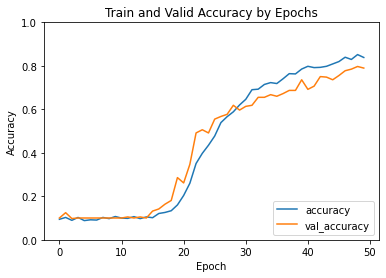

In [49]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title("Train and Valid Accuracy by Epochs")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')

In [50]:
model2.load_weights("C:\\Users\\SREEHARI\\Desktop\\internship\\my training\\Chapter11_CNN\\m2_Dropout_Rec_fld_50epochs.h5")

history=model2.fit_generator(
        train_generator, 
        steps_per_epoch = len(train_generator), 
        epochs=2,
        validation_data = validation_generator,
        validation_steps = len(validation_generator), 
        verbose=1)

Epoch 1/2
26/26 [==============================] - 2s 66ms/step - loss: 0.3932 - accuracy: 0.8590 - val_loss: 0.8478 - val_accuracy: 0.7604
Epoch 2/2
26/26 [==============================] - 2s 59ms/step - loss: 0.3891 - accuracy: 0.8639 - val_loss: 0.6779 - val_accuracy: 0.7946


#### Dropout 100 epochs

In [52]:
# model compilation
model2.compile(optimizer =SGD(lr=0.01, momentum = 0.9), loss = 'categorical_crossentropy', metrics = ['accuracy'])

########################
# fit model and train
########################

import time
start = time.time()

history=model2.fit_generator(
        train_generator, 
        steps_per_epoch = len(train_generator), 
        epochs=100,
        validation_data = validation_generator,
        validation_steps = len(validation_generator), 
        verbose=1)

model2.save_weights('m2_Dropout_Rec_fld_100epochs.h5')

end = time.time()
print("Execution time is", int(end - start), "seconds")

Epoch 1/100
26/26 [==============================] - 3s 66ms/step - loss: 0.3682 - accuracy: 0.8778 - val_loss: 0.8689 - val_accuracy: 0.7726
Epoch 2/100
26/26 [==============================] - 1s 54ms/step - loss: 0.4135 - accuracy: 0.8633 - val_loss: 0.7916 - val_accuracy: 0.7726
Epoch 3/100
26/26 [==============================] - 1s 54ms/step - loss: 0.4030 - accuracy: 0.8657 - val_loss: 0.6260 - val_accuracy: 0.8093
Epoch 4/100
26/26 [==============================] - 1s 55ms/step - loss: 0.3584 - accuracy: 0.8724 - val_loss: 0.6876 - val_accuracy: 0.7995
Epoch 5/100
26/26 [==============================] - 1s 53ms/step - loss: 0.3734 - accuracy: 0.8711 - val_loss: 0.7544 - val_accuracy: 0.7995ss: 0.3879 - accuracy
Epoch 6/100
26/26 [==============================] - 1s 54ms/step - loss: 0.3698 - accuracy: 0.8796 - val_loss: 0.7021 - val_accuracy: 0.7971
Epoch 7/100
26/26 [==============================] - 1s 56ms/step - loss: 0.3297 - accuracy: 0.8820 - val_loss: 0.6288 - val_ac

26/26 [==============================] - 1s 54ms/step - loss: 0.1342 - accuracy: 0.9492 - val_loss: 0.3872 - val_accuracy: 0.8900
Epoch 59/100
26/26 [==============================] - 1s 52ms/step - loss: 0.1461 - accuracy: 0.9413 - val_loss: 0.4410 - val_accuracy: 0.8753
Epoch 60/100
26/26 [==============================] - 1s 54ms/step - loss: 0.1354 - accuracy: 0.9474 - val_loss: 0.4541 - val_accuracy: 0.8851
Epoch 61/100
26/26 [==============================] - 2s 58ms/step - loss: 0.1494 - accuracy: 0.9449 - val_loss: 0.6949 - val_accuracy: 0.8557
Epoch 62/100
26/26 [==============================] - 2s 62ms/step - loss: 0.1363 - accuracy: 0.9546 - val_loss: 0.7857 - val_accuracy: 0.8337
Epoch 63/100
26/26 [==============================] - 1s 54ms/step - loss: 0.1614 - accuracy: 0.9456 - val_loss: 0.6016 - val_accuracy: 0.8460
Epoch 64/100
26/26 [==============================] - 1s 53ms/step - loss: 0.1493 - accuracy: 0.9468 - val_loss: 0.5937 - val_accuracy: 0.8337
Epoch 65/100

In [53]:
model2.load_weights("C:\\Users\\SREEHARI\\Desktop\\internship\\my training\\Chapter11_CNN\\m2_Dropout_Rec_fld_100epochs.h5")

history=model2.fit_generator(
        train_generator, 
        steps_per_epoch = len(train_generator), 
        epochs=2,
        validation_data = validation_generator,
        validation_steps = len(validation_generator), 
        verbose=1)

Epoch 1/2
26/26 [==============================] - 2s 59ms/step - loss: 0.1131 - accuracy: 0.9540 - val_loss: 0.5628 - val_accuracy: 0.8729
Epoch 2/2
26/26 [==============================] - 1s 53ms/step - loss: 0.1356 - accuracy: 0.9516 - val_loss: 0.4594 - val_accuracy: 0.8851


## Batch Normalization

In [55]:
model = Sequential()
model.add(Conv2D(1, (3, 3), input_shape = (32, 32, 1)))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(2, (3, 3)))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(3, (3, 3)))
model.add(BatchNormalization())

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 30, 30, 1)         10        
_________________________________________________________________
batch_normalization_5 (Batch (None, 30, 30, 1)         4         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 15, 15, 1)         0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 15, 15, 1)         4         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 13, 13, 2)         20        
_________________________________________________________________
batch_normalization_7 (Batch (None, 13, 13, 2)         8         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 6, 6, 2)         

## Model3 with Batch Normalization. 

In [56]:
model3 = Sequential()

model3.add(Conv2D(16, (3, 3), input_shape = (64, 64, 1), activation = 'relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Conv2D(16, (3, 3), activation = 'relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Conv2D(32, (3, 3), activation = 'relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Conv2D(32, (3, 3), activation = 'relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Conv2D(64, (3, 3), activation = 'relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Flatten())
model3.add(Dense(units = 16, activation = 'relu'))
model3.add(Dropout(0.5))
model3.add(Dense(units = 10, activation = 'softmax'))

model3.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 62, 62, 16)        160       
_________________________________________________________________
batch_normalization_10 (Batc (None, 62, 62, 16)        64        
_________________________________________________________________
dropout_4 (Dropout)          (None, 62, 62, 16)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 60, 60, 16)        2320      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 30, 30, 16)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 30, 30, 16)        64        
_________________________________________________________________
dropout_5 (Dropout)          (None, 30, 30, 16)      

In [57]:
model3.compile(optimizer =SGD(lr=0.03, momentum = 0.9), loss = 'categorical_crossentropy', metrics = ['accuracy'])

########################
# fit model and train
########################

import time
start = time.time()

history=model3.fit_generator(
        train_generator, 
        steps_per_epoch = len(train_generator), 
        epochs=200,
        validation_data = validation_generator,
        validation_steps = len(validation_generator), 
        verbose=1)

model3.save_weights('m3_BatchNorm_200epochs.h5')

end = time.time()
print("Execution time is", int(end - start), "seconds")

Epoch 1/200
26/26 [==============================] - 3s 67ms/step - loss: 2.4876 - accuracy: 0.1101 - val_loss: 9.4889 - val_accuracy: 0.1418
Epoch 2/200
26/26 [==============================] - 1s 53ms/step - loss: 2.1565 - accuracy: 0.1900 - val_loss: 5.0439 - val_accuracy: 0.1589
Epoch 3/200
26/26 [==============================] - 1s 50ms/step - loss: 2.0347 - accuracy: 0.2371 - val_loss: 2.4942 - val_accuracy: 0.1467
Epoch 4/200
26/26 [==============================] - 1s 54ms/step - loss: 1.9198 - accuracy: 0.2855 - val_loss: 2.7482 - val_accuracy: 0.1002
Epoch 5/200
26/26 [==============================] - 1s 54ms/step - loss: 1.7413 - accuracy: 0.3466 - val_loss: 2.9084 - val_accuracy: 0.0954
Epoch 6/200
26/26 [==============================] - 1s 55ms/step - loss: 1.6355 - accuracy: 0.3950 - val_loss: 4.0343 - val_accuracy: 0.1002
Epoch 7/200
26/26 [==============================] - 1s 53ms/step - loss: 1.5907 - accuracy: 0.4017 - val_loss: 6.0505 - val_accuracy: 0.0978
Epoch 

26/26 [==============================] - 1s 55ms/step - loss: 0.6918 - accuracy: 0.7647 - val_loss: 1.3698 - val_accuracy: 0.6235
Epoch 59/200
26/26 [==============================] - 1s 54ms/step - loss: 0.6839 - accuracy: 0.7598 - val_loss: 1.4056 - val_accuracy: 0.6064
Epoch 60/200
26/26 [==============================] - 1s 52ms/step - loss: 0.7125 - accuracy: 0.7623 - val_loss: 1.3615 - val_accuracy: 0.6284
Epoch 61/200
26/26 [==============================] - 1s 53ms/step - loss: 0.6536 - accuracy: 0.7786 - val_loss: 1.4151 - val_accuracy: 0.6406
Epoch 62/200
26/26 [==============================] - 1s 49ms/step - loss: 0.6774 - accuracy: 0.7677 - val_loss: 1.7224 - val_accuracy: 0.5917
Epoch 63/200
26/26 [==============================] - 1s 55ms/step - loss: 0.6624 - accuracy: 0.7647 - val_loss: 1.4825 - val_accuracy: 0.6039
Epoch 64/200
26/26 [==============================] - 1s 56ms/step - loss: 0.6866 - accuracy: 0.7731 - val_loss: 1.1714 - val_accuracy: 0.6773
Epoch 65/200

26/26 [==============================] - 1s 54ms/step - loss: 0.5429 - accuracy: 0.8203 - val_loss: 1.3153 - val_accuracy: 0.7090
Epoch 116/200
26/26 [==============================] - 1s 54ms/step - loss: 0.5531 - accuracy: 0.8185 - val_loss: 1.5136 - val_accuracy: 0.6773
Epoch 117/200
26/26 [==============================] - 1s 50ms/step - loss: 0.6092 - accuracy: 0.7992 - val_loss: 1.7570 - val_accuracy: 0.6797
Epoch 118/200
26/26 [==============================] - 1s 55ms/step - loss: 0.6130 - accuracy: 0.7895 - val_loss: 1.3964 - val_accuracy: 0.6577
Epoch 119/200
26/26 [==============================] - 1s 52ms/step - loss: 0.5343 - accuracy: 0.8246 - val_loss: 1.1156 - val_accuracy: 0.6895
Epoch 120/200
26/26 [==============================] - 1s 53ms/step - loss: 0.5741 - accuracy: 0.8125 - val_loss: 1.2546 - val_accuracy: 0.6504
Epoch 121/200
26/26 [==============================] - 1s 55ms/step - loss: 0.5742 - accuracy: 0.8058 - val_loss: 1.0093 - val_accuracy: 0.7262
Epoch 

Epoch 172/200
26/26 [==============================] - 1s 52ms/step - loss: 0.5181 - accuracy: 0.8318 - val_loss: 1.0703 - val_accuracy: 0.6993
Epoch 173/200
26/26 [==============================] - 1s 54ms/step - loss: 0.5304 - accuracy: 0.8191 - val_loss: 1.3711 - val_accuracy: 0.7090
Epoch 174/200
26/26 [==============================] - 1s 53ms/step - loss: 0.5210 - accuracy: 0.8155 - val_loss: 1.3980 - val_accuracy: 0.6675
Epoch 175/200
26/26 [==============================] - 1s 53ms/step - loss: 0.5372 - accuracy: 0.8276 - val_loss: 1.2780 - val_accuracy: 0.6577
Epoch 176/200
26/26 [==============================] - 1s 55ms/step - loss: 0.4822 - accuracy: 0.8451 - val_loss: 1.2149 - val_accuracy: 0.6699
Epoch 177/200
26/26 [==============================] - 1s 54ms/step - loss: 0.5012 - accuracy: 0.8264 - val_loss: 0.9367 - val_accuracy: 0.7359
Epoch 178/200
26/26 [==============================] - 1s 54ms/step - loss: 0.4781 - accuracy: 0.8397 - val_loss: 0.9919 - val_accuracy:

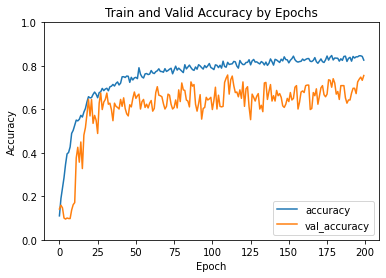

In [58]:
## Plotting the results 
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title("Train and Valid Accuracy by Epochs")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')

In [60]:
model3.load_weights("C:\\Users\\SREEHARI\\Desktop\\internship\\my training\\Chapter11_CNN\\m3_BatchNorm_200epochs.h5")

history=model3.fit_generator(
        train_generator, 
        steps_per_epoch = len(train_generator), 
        epochs=2,
        validation_data = validation_generator,
        validation_steps = len(validation_generator), 
        verbose=1)

Epoch 1/2
26/26 [==============================] - 2s 59ms/step - loss: 0.5121 - accuracy: 0.8445 - val_loss: 1.0400 - val_accuracy: 0.7457
Epoch 2/2
26/26 [==============================] - 1s 48ms/step - loss: 0.5443 - accuracy: 0.8167 - val_loss: 1.0862 - val_accuracy: 0.6846


## Adam  Optimizer 

In [61]:
model3.compile(optimizer =Adam(learning_rate=0.005, beta_1=0.9, beta_2=0.999), loss = 'categorical_crossentropy', metrics = ['accuracy'])

########################
# fit model and train
########################

import time
start = time.time()

history=model3.fit_generator(
        train_generator, 
        steps_per_epoch = len(train_generator), 
        epochs=100,
        validation_data = validation_generator,
        validation_steps = len(validation_generator), 
        verbose=1)

model3.save_weights('m3_BatchNorm_and_Adam_100epochs.h5')

end = time.time()
print("Execution time is", int(end - start), "seconds")

Epoch 1/100
26/26 [==============================] - 2s 65ms/step - loss: 0.5254 - accuracy: 0.8215 - val_loss: 2.7839 - val_accuracy: 0.6161
Epoch 2/100
26/26 [==============================] - 1s 54ms/step - loss: 0.4872 - accuracy: 0.8427 - val_loss: 1.5000 - val_accuracy: 0.6724
Epoch 3/100
26/26 [==============================] - 1s 55ms/step - loss: 0.5123 - accuracy: 0.8282 - val_loss: 0.9025 - val_accuracy: 0.7164
Epoch 4/100
26/26 [==============================] - 1s 55ms/step - loss: 0.5202 - accuracy: 0.8409 - val_loss: 0.8148 - val_accuracy: 0.7555
Epoch 5/100
26/26 [==============================] - 1s 50ms/step - loss: 0.4966 - accuracy: 0.8294 - val_loss: 1.0684 - val_accuracy: 0.6895
Epoch 6/100
26/26 [==============================] - 1s 55ms/step - loss: 0.4922 - accuracy: 0.8306 - val_loss: 0.9893 - val_accuracy: 0.7384
Epoch 7/100
26/26 [==============================] - 1s 56ms/step - loss: 0.4931 - accuracy: 0.8246 - val_loss: 1.2685 - val_accuracy: 0.7017
Epoch 

26/26 [==============================] - 1s 51ms/step - loss: 0.4215 - accuracy: 0.8705 - val_loss: 1.0697 - val_accuracy: 0.7090
Epoch 59/100
26/26 [==============================] - 1s 55ms/step - loss: 0.4800 - accuracy: 0.8451 - val_loss: 2.0564 - val_accuracy: 0.6235
Epoch 60/100
26/26 [==============================] - 1s 54ms/step - loss: 0.4360 - accuracy: 0.8584 - val_loss: 1.7427 - val_accuracy: 0.6235
Epoch 61/100
26/26 [==============================] - 1s 57ms/step - loss: 0.4511 - accuracy: 0.8469 - val_loss: 2.5236 - val_accuracy: 0.5941
Epoch 62/100
26/26 [==============================] - 1s 50ms/step - loss: 0.4362 - accuracy: 0.8633 - val_loss: 2.7214 - val_accuracy: 0.6333
Epoch 63/100
26/26 [==============================] - 1s 54ms/step - loss: 0.4569 - accuracy: 0.8572 - val_loss: 0.7361 - val_accuracy: 0.7604
Epoch 64/100
26/26 [==============================] - 1s 56ms/step - loss: 0.4521 - accuracy: 0.8512 - val_loss: 1.3125 - val_accuracy: 0.7164
Epoch 65/100

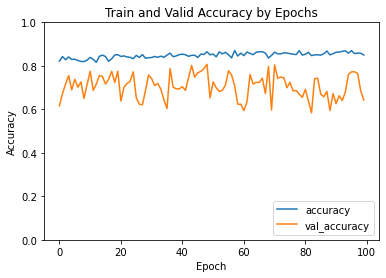

In [62]:
## Plotting the results 
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title("Train and Valid Accuracy by Epochs")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')

In [64]:
model3.load_weights("C:\\Users\\SREEHARI\\Desktop\\internship\\my training\\Chapter11_CNN\\m3_BatchNorm_and_Adam_100epochs.h5")

history=model3.fit_generator(
        train_generator, 
        steps_per_epoch = len(train_generator), 
        epochs=2,
        validation_data = validation_generator,
        validation_steps = len(validation_generator), 
        verbose=1)

Epoch 1/2
26/26 [==============================] - 2s 61ms/step - loss: 0.3920 - accuracy: 0.8784 - val_loss: 1.2424 - val_accuracy: 0.7262
Epoch 2/2
26/26 [==============================] - 1s 55ms/step - loss: 0.4192 - accuracy: 0.8560 - val_loss: 0.9435 - val_accuracy: 0.7164
